# ASSIGNMENT ON LEAD SCORING - CASE STUDY

# Problem Statement

    X Education, an education company, sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. People land on the website,  browse the courses or fill up a form for the course or watch some videos.
    The company  gets leads through past referrals and the data  filled form providing their email address or phone number.Leads are attend by employees from the sales team throug calls, emails, etc. Some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
    X Education want to identify the most potential leads called ‘Hot Leads’.The sales team will  be focus more on communicating with the Hot Leads rather than making calls to everyone. Hence, the lead conversion rate should go up.
    The company has a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.  The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 
    

# Business Goal

1.The goal is to identify most promising leads, i.e. the leads that are most likely to convert into paying customers. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
2. There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so it can handle these as well. 
 

# Solution Approach

1. Data loading and understanding
2. Data Pre Processing
3. Exploratory Data Analysis (EDA)
4. 
Data Preparation
5. 
Model Building and Evaaaution

## Data loading and understanding

In [179]:
# Importing The required Libraries


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [181]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [182]:
# Importing the data set

In [183]:
df= pd.read_csv("Leads.csv")

In [184]:
df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified


In [297]:
df.sample(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
6490,2059a6ce-7b1a-44a6-8543-74106f754132,600103,API,Google,0,0,1.0,32,1.0,Converted to Lead,Unemployed,Already a student,0,Modified
954,3db9d1cc-ee83-4ba4-b73d-60056c6f40ad,650153,Landing Page Submission,Direct Traffic,0,1,2.0,1613,2.0,Email Opened,Working Professional,Will revert after reading the email,1,Email Opened


In [185]:

# Columns are truncated so we need set max column

In [188]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [189]:
df.shape

(9240, 37)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [191]:
# get the features

In [192]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Summary of data

In [ ]:
# The dataset have  37 feature and 9240 points.

In [ ]:
# 
heree are f n ofo null value in thedataa set  those need to be takenare.e

In [ ]:
# 3.The data type are in  proper format  except 'total viist', 'Asymmetrique Activity Score   'Asymmetrique Profile Score'. The data type can be change to int in place of float

In [ ]:
# 4.
The meaning of features are well explained in te atatached defination file

## Data Pre Processing

### Missing Values

In [193]:
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [194]:
# drop the column having null value more than 40%

In [195]:
df=df.drop(["Lead Quality",'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],axis=1)

In [196]:
# Checking the  value 'select' in the entire DataFrame
cols_with_select = df.applymap(lambda x: x == 'Select').any()

# Print the columns where 'select' is present
Select_columns = cols_with_select[cols_with_select].index.tolist()

print("Columns containing 'select':", Select_columns)
    

Columns containing 'select': ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [197]:
for i in Select_columns:
    print(df[i].value_counts()*100/df.shape[0])
    print('---------------------')
    
    

Specialization
Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: count, dtype: float64
---------------------
How did you hear about X Education
Select 

In [198]:
# all column   have more than 40 % null value including "Select" so dropping the all column 

In [199]:
df=df.drop(['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'],axis=1)

In [200]:
df.shape

(9240, 28)

In [ ]:
# some column have invariance data that have no use 

In [201]:
unvariance_col=['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Country','Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque']

In [202]:
for column in df.columns:
    print(df[column].astype('category').value_counts())
    print("__________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa4f0ba5-5985-469f-8cd7-98f7b20d27ea    1
aa503b9c-f853-497f-a1cc-97d6b13312d1    1
aa52eef4-bd60-4c64-8d38-a30ba71b5110    1
aa5a7ddf-b20e-4e2e-a477-15227ca4e96a    1
aa5fb614-bf24-408d-9c89-e97b91d9479d    1
aa5ff9e9-bd5c-4a6e-bc03-e19552725635    1
aa613715-ff22-429d-9fbb-92da56b827aa    1
aa6fc8ca-ae09-4c9e-bae0-0427f5f56a70    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
aa1edcad-f74f-426c-881a-5bbaa5ce717d    1
aa02cd65-92f9-447c-8cc2-44b7b6f817fe    1
a9fab024-c486-4a99-a05d-aba8c6252dc8    1
a9c7f60c-930b-4504-a092-ab3ae2dc4578    1
a9b4f35e-6df5-4ed4-9753-f35753c08195    1
a9b52d1c-72a1-45f8-b013-32289dd31e81    1
a9b775f3-1c01-45b8-879

In [204]:
#Drop invariance column


In [205]:
df=df.drop(['Do Not Call','What matters most to you in choosing a course', 'Search','Country', 'Magazine'],axis=1)

In [206]:
df=df.drop(['Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations'],axis=1)

In [207]:
df=df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque'],axis=1)

In [208]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [209]:
# The column 'Total Time Spent on Website' is skewed and all other are not skewed


cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].nunique()>100:
        num_cols.append(i)
    else:
        cat_cols.append(i) 

In [210]:
100*df.isnull().mean()

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
What is your current occupation           29.112554
Tags                                      36.287879
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [211]:
# rest column having null value
null_column=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity','What is your current occupation','Tags']

In [ ]:
# All the rows are being drpped

In [212]:
for i in null_column:
    df = df[~pd.isnull(df[i])]

In [213]:
100*df.isnull().mean()

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [214]:
df.shape

(5666, 14)

In [ ]:
Now the data are clean

## Exploratory Data Analysis (EDA)

In [215]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [216]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5666.000000,5666.000000,5666.000000,5666.000000,5666.000000
mean,615933.866926,0.452877,3.724497,543.632369,2.582031
std,23528.941492,0.497818,4.921537,563.463335,2.062967
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,595176.500000,0.000000,2.000000,56.000000,1.250000
50%,613000.000000,0.000000,3.000000,298.000000,2.000000
75%,636855.750000,1.000000,5.000000,1026.750000,4.000000
max,660737.000000,1.000000,251.000000,2272.000000,16.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5666 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5666 non-null   object 
 1   Lead Number                             5666 non-null   int64  
 2   Lead Origin                             5666 non-null   object 
 3   Lead Source                             5666 non-null   object 
 4   Do Not Email                            5666 non-null   object 
 5   Converted                               5666 non-null   int64  
 6   TotalVisits                             5666 non-null   float64
 7   Total Time Spent on Website             5666 non-null   int64  
 8   Page Views Per Visit                    5666 non-null   float64
 9   Last Activity                           5666 non-null   object 
 10  What is your current occupation         5666 non-null   object 
 

In [218]:
numcol=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
catcol=[ 'Lead Origin', 'Lead Source', 'Do Not Email',  'Last Activity',  'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

## Univariate Analysis

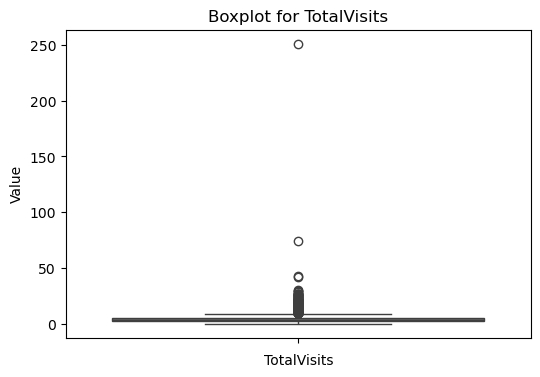

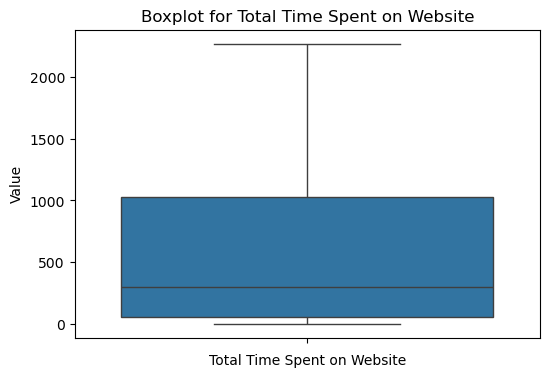

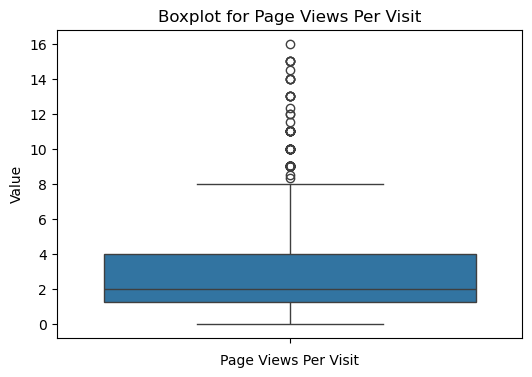

In [219]:
def plotting(dataframe, col):
    plt.figure(figsize=(6, 4))
    sns.boxplot(dataframe[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()
for col in numcol:
    plotting(df, col)

In [220]:
# Summary: The features 'TotalVisits'  have outliers but these have signifcance in the data set ,So kept as it is.

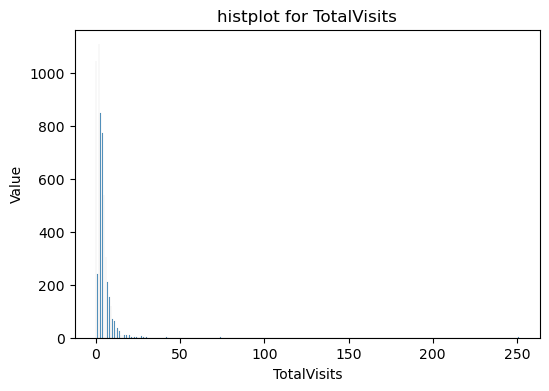

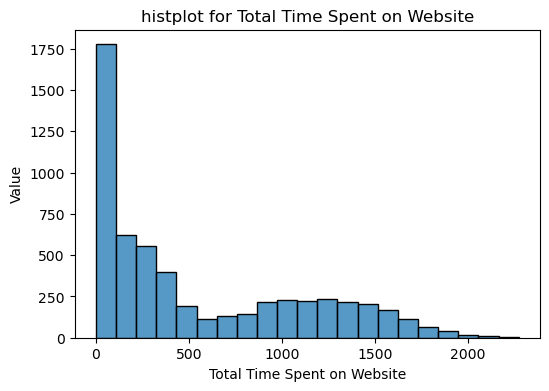

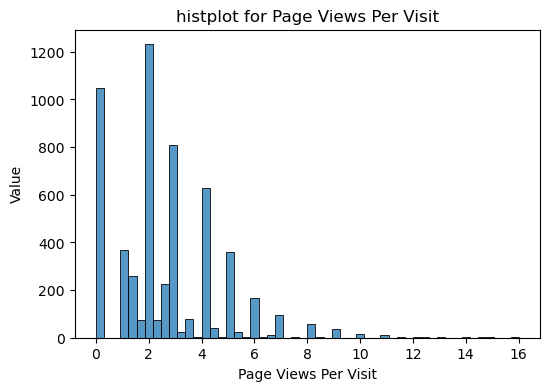

In [221]:
def plotting(dataframe, col):
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe[col])
    plt.title(f'histplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()
for col in numcol:
    plotting(df, col)

In [222]:
#Summary:More people vist for lower time and decrease till 700 min  then increse  upto 1200min then decrease. 

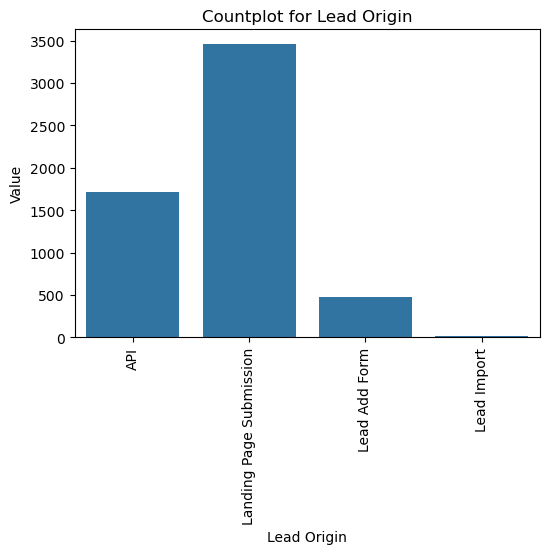

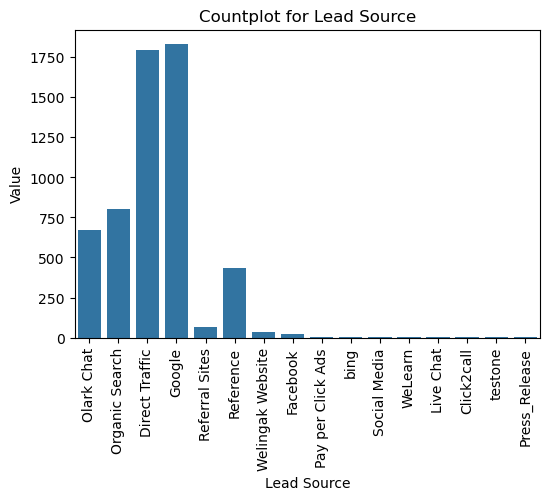

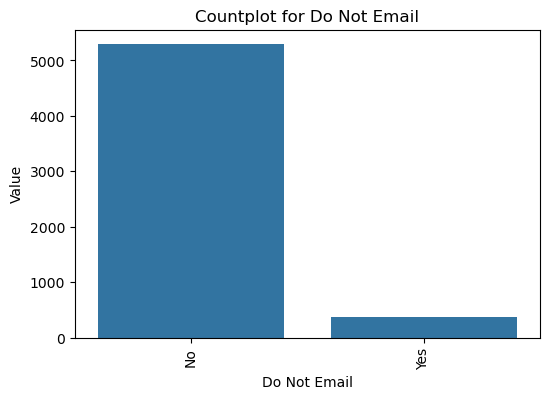

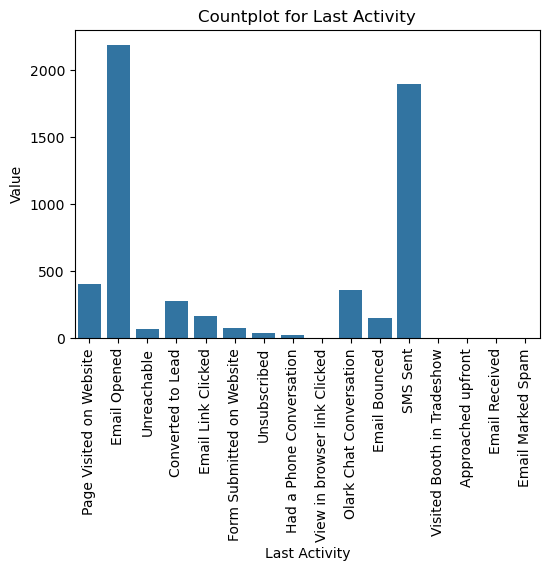

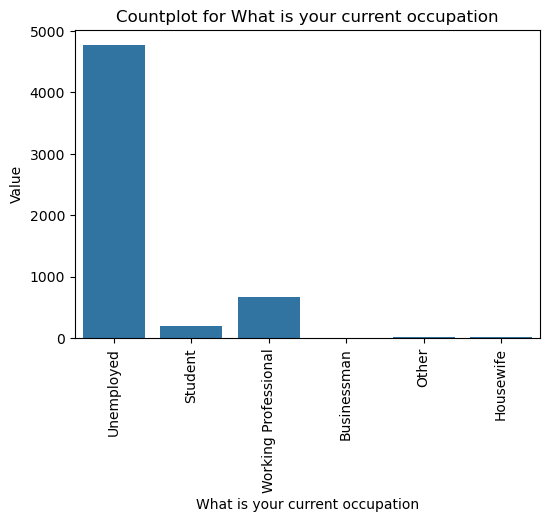

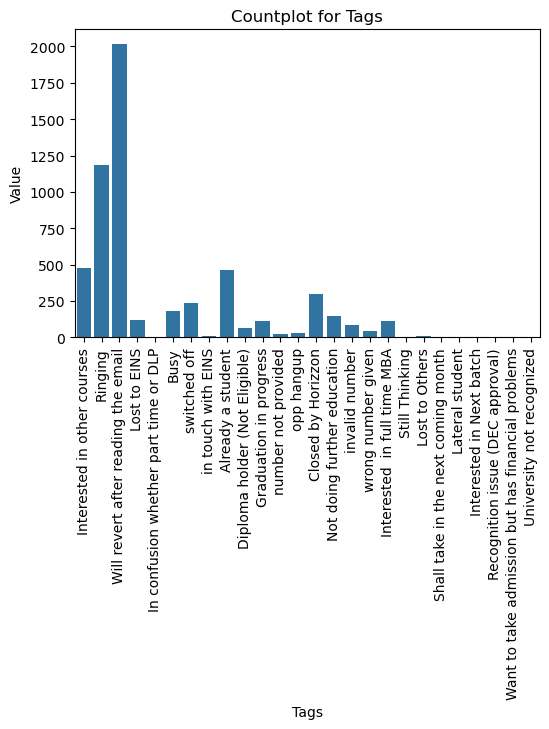

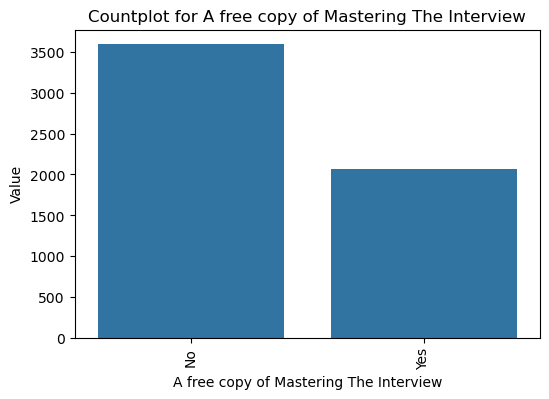

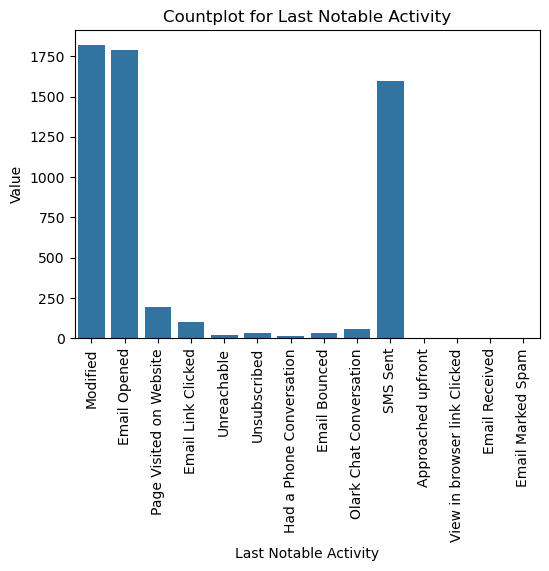

In [223]:
def plotting(dataframe, col):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df,x=df[col])
    plt.title(f'Countplot for {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Value')
    plt.show()
for col in catcol:
    plotting(df, col)

## Bivariate analysis

In [224]:
# Plotting bar plot of categorical variables vs cnt

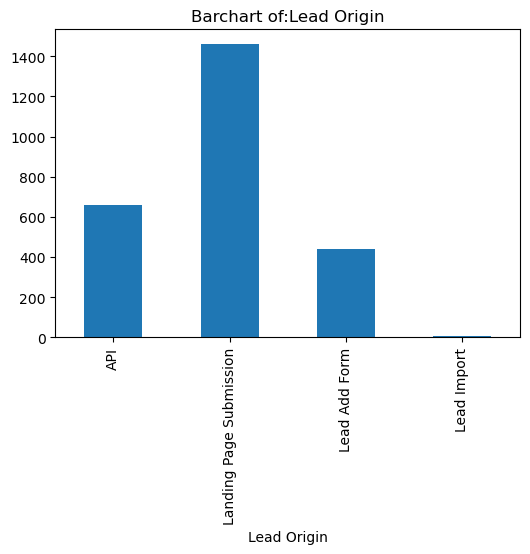

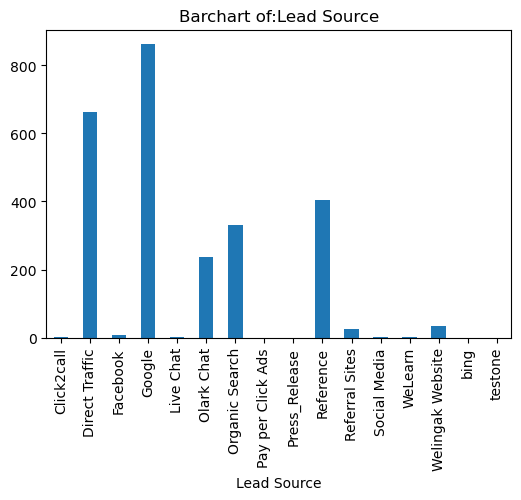

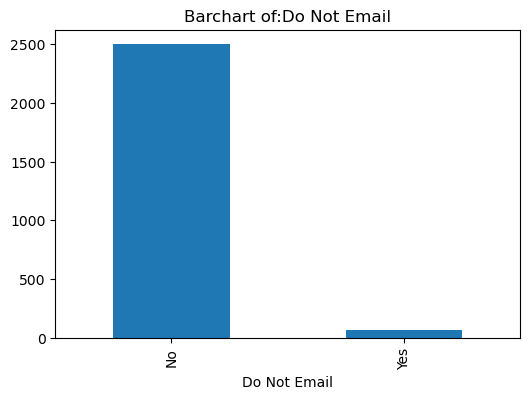

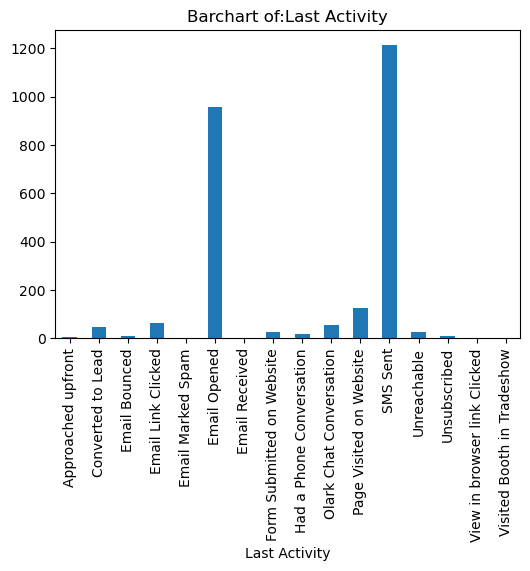

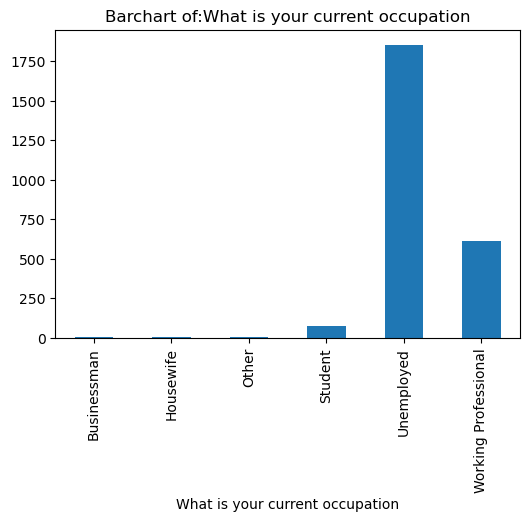

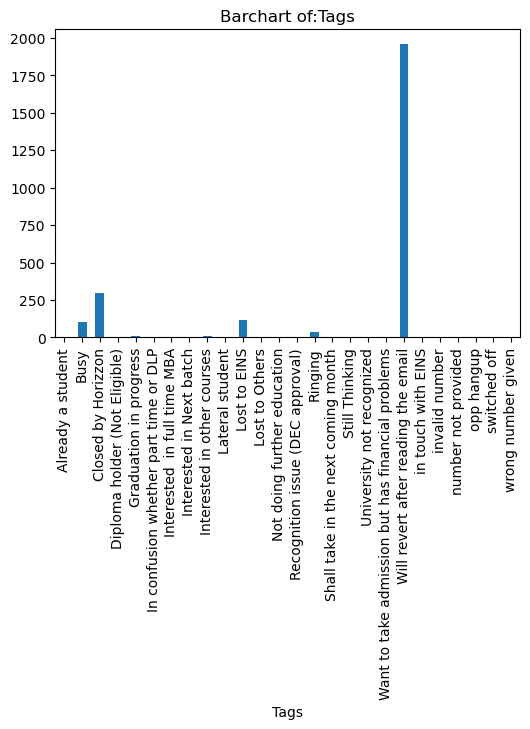

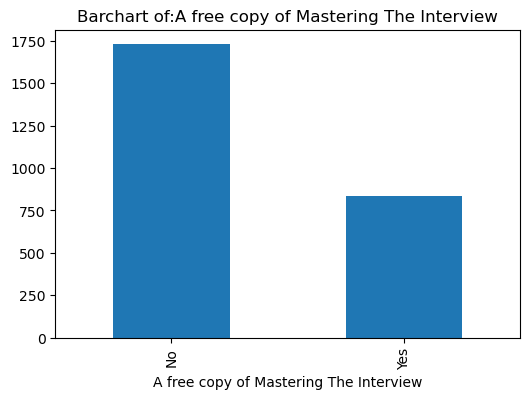

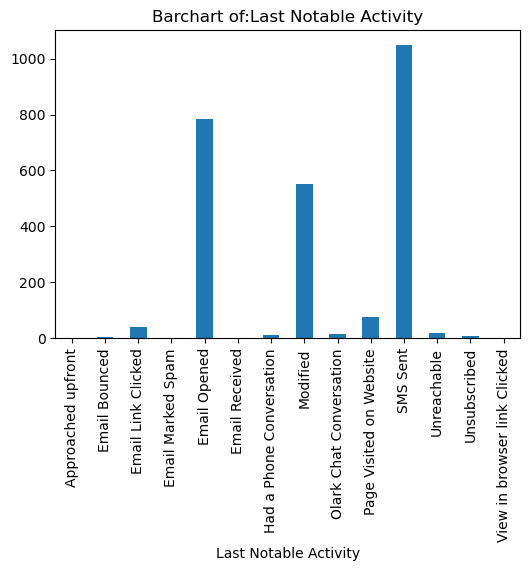

In [225]:
def plottingbar(dataframe, col):
    plt.figure(figsize=(6, 4))
    df.groupby(col)['Converted'].sum().plot(kind="bar")
    plt.title('Barchart of:'+ col)

    plt.show()
for col in catcol:
    plottingbar(df, col)

    plt.show()


Summary:1. API and Landing page submission student have more conversion. 2. people from source google, Direct tariff, and organic have more chance of taking the course 3. Who opted for donot mail have rare chance of conversion 4. People having last activity of opening mail or sent SMS have high chance of conversion 5. unemployed people have high conversion. 6. who was target with 'will revert after reading email' have high conversion probability.

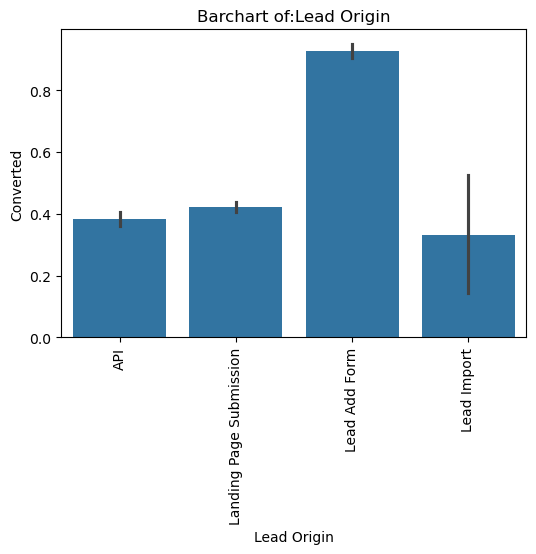

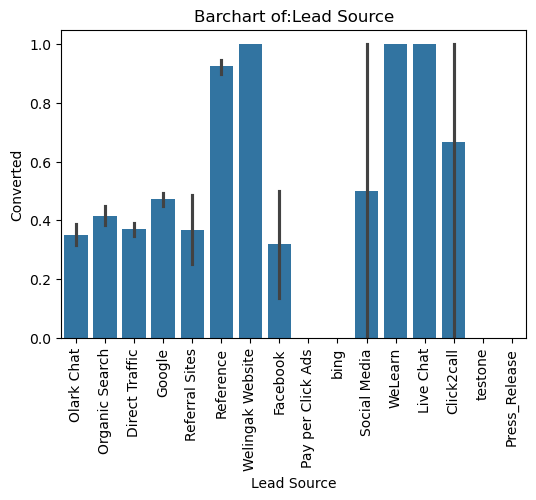

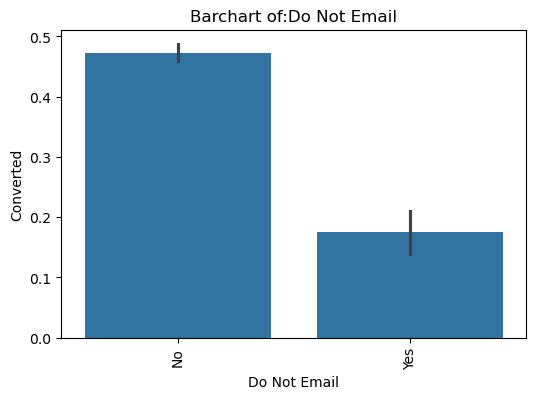

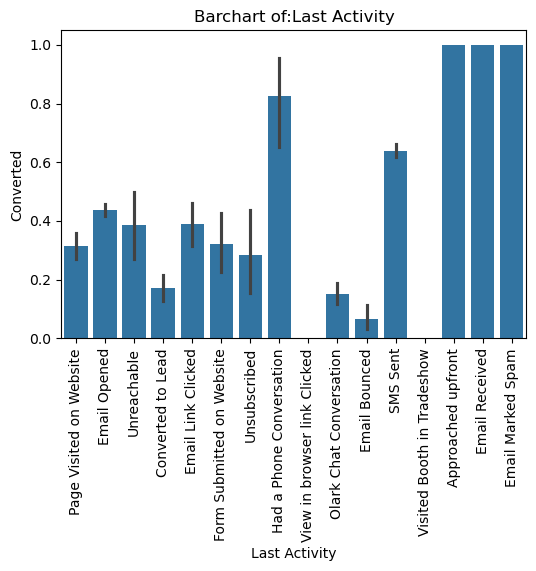

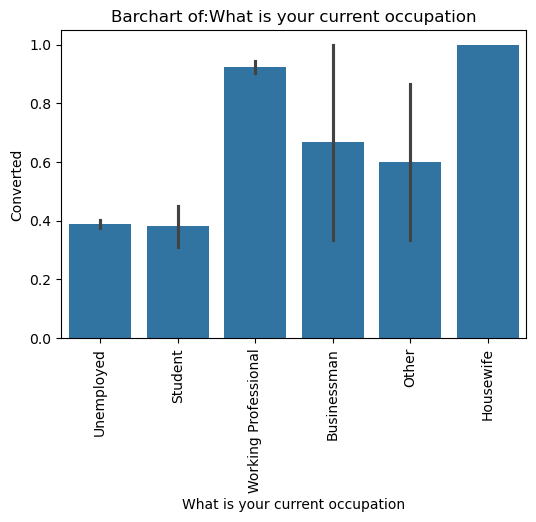

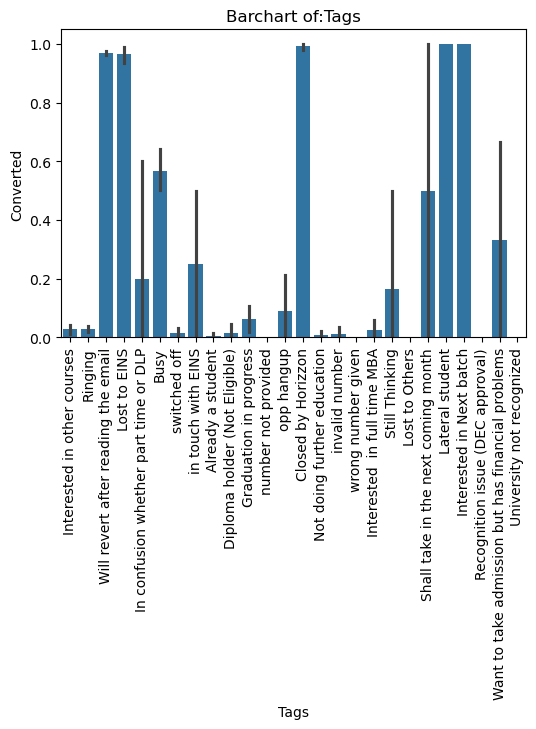

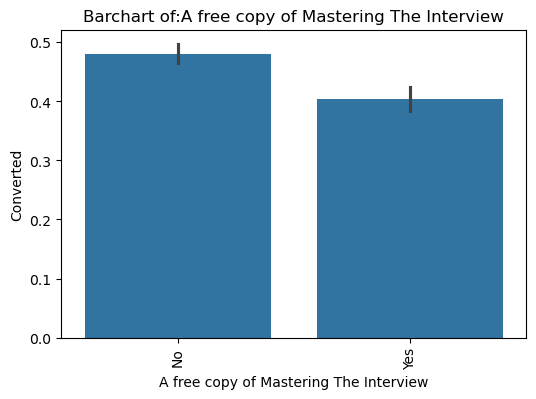

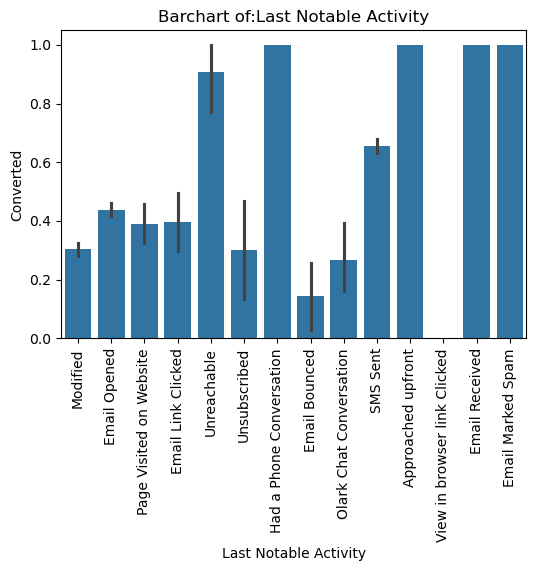

In [226]:
def plottingbar(dataframe, col):
    plt.figure(figsize=(6, 4))
    sns.barplot(x= col, y='Converted', data=df)
    plt.title('Barchart of:'+ col)
    plt.xticks(rotation=90)
    
    plt.show()
for col in catcol:
    plottingbar(df, col)

    plt.show()



## Multi Variate analysis

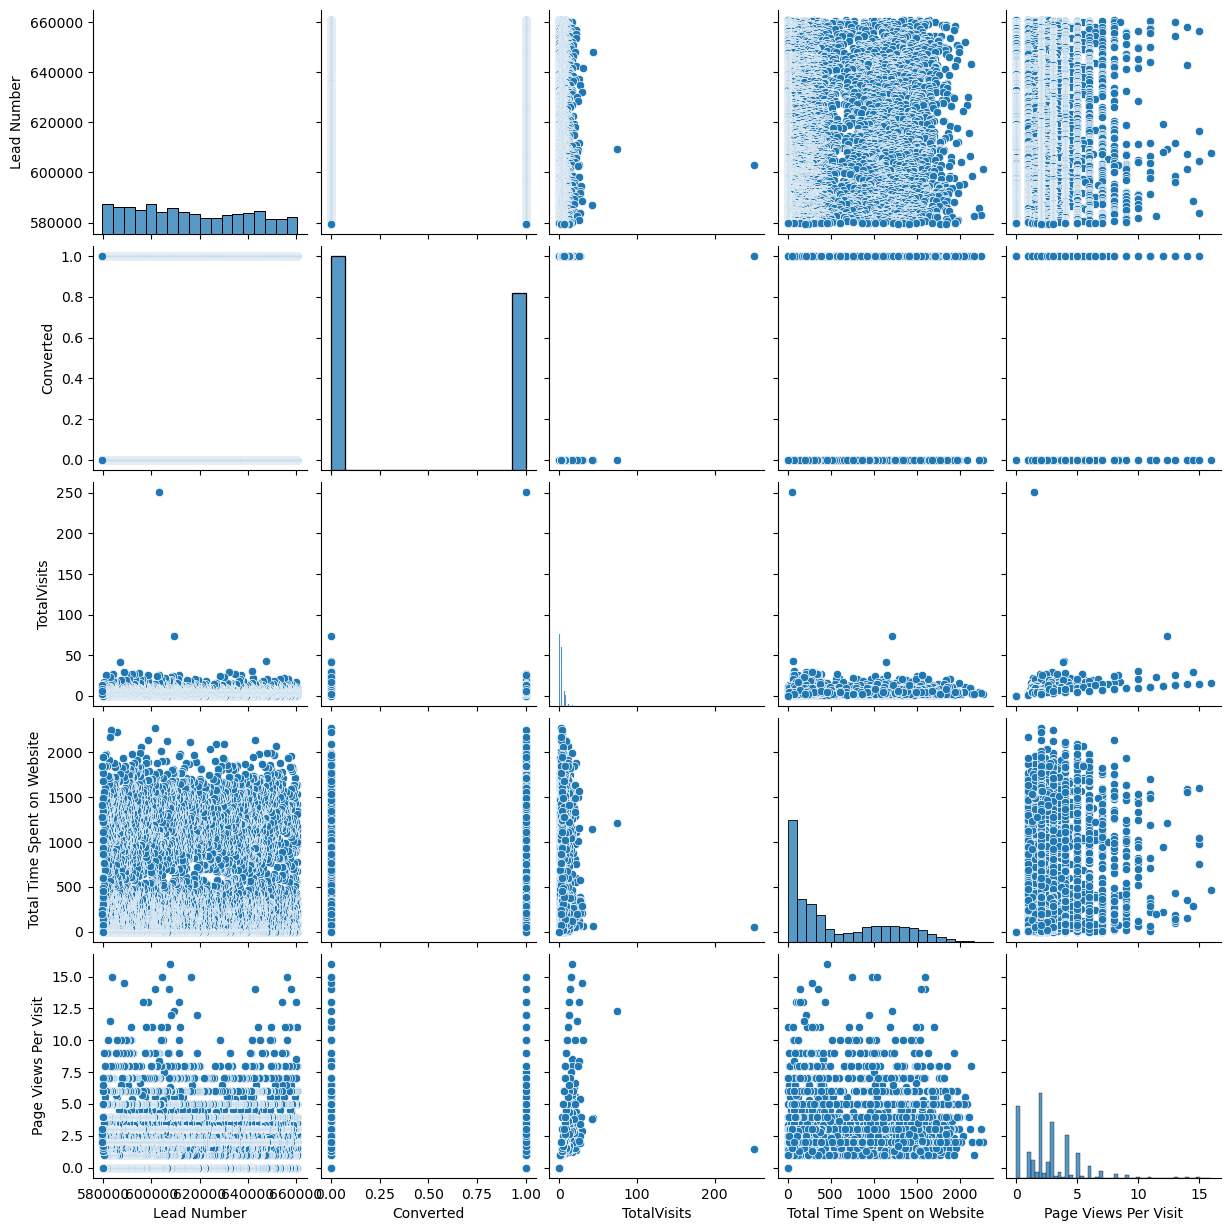

In [227]:
sns.pairplot(df)
plt.show()

In [228]:
corr=df.corr(numeric_only=True)
corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.091484,0.008443,0.034235,0.040032
Converted,0.091484,1.000000,0.025141,0.339829,-0.034967
TotalVisits,0.008443,0.025141,1.000000,0.190621,0.469510
Total Time Spent on Website,0.034235,0.339829,0.190621,1.000000,0.298349
Page Views Per Visit,0.040032,-0.034967,0.469510,0.298349,1.000000


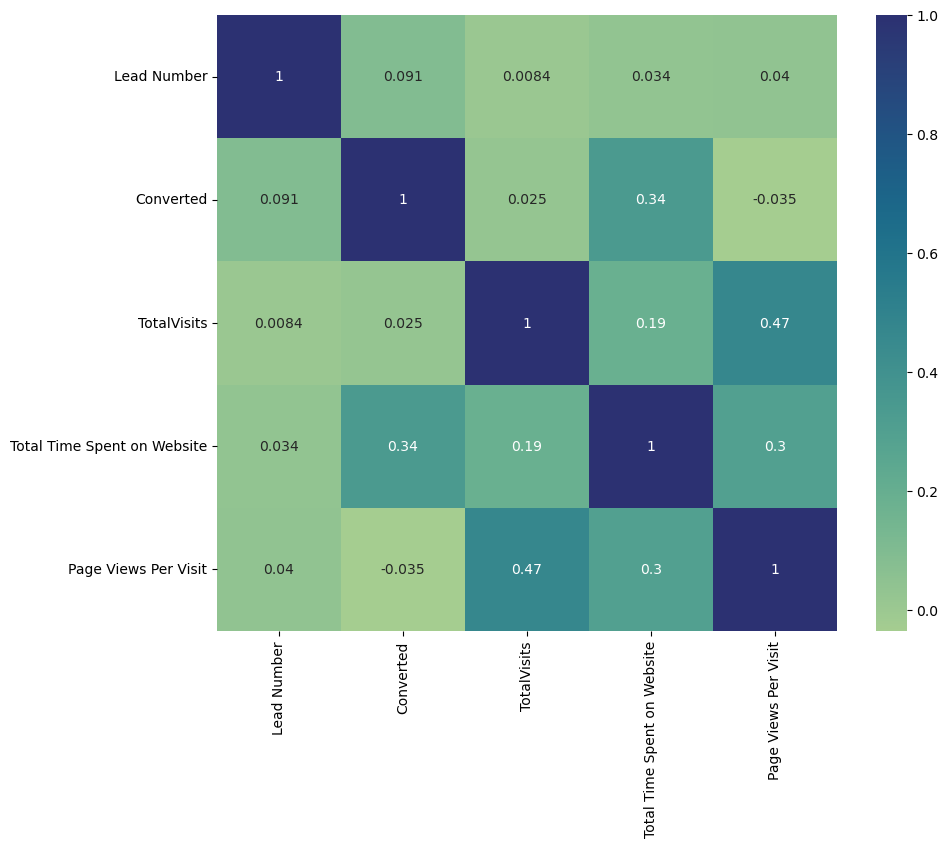

In [229]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='crest',annot=True)
plt.show()

###  Data Preparation

In [230]:
df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Interested in other courses,No,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [231]:
varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the  list
df[varlist] = df[varlist].apply(binary_map)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5666 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5666 non-null   object 
 1   Lead Number                             5666 non-null   int64  
 2   Lead Origin                             5666 non-null   object 
 3   Lead Source                             5666 non-null   object 
 4   Do Not Email                            5666 non-null   int64  
 5   Converted                               5666 non-null   int64  
 6   TotalVisits                             5666 non-null   float64
 7   Total Time Spent on Website             5666 non-null   int64  
 8   Page Views Per Visit                    5666 non-null   float64
 9   Last Activity                           5666 non-null   object 
 10  What is your current occupation         5666 non-null   object 
 

In [233]:
# Prospect ID and Lead Number won't be of any use in the analysis, so  dropping these two variables.

In [234]:
df_leads=df.drop(['Prospect ID','Lead Number'],axis=1)

In [235]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Dummification

In [236]:
dum_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 
       'Last Activity', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
# Dummies to be created for all categorical columns which are having more than 2 unique values

In [237]:
dum=pd.get_dummies(df_leads[dum_cols],drop_first=True,dtype=int)
df_leads=pd.concat([df_leads,dum],axis=1)
df_leads=df_leads.drop(dum_cols,axis=1)

In [238]:
df_leads.head(1)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [239]:
df_leads.shape

(5666, 80)

In [240]:
X=df_leads.drop("Converted",axis=1)
y=df_leads["Converted"]

### Test-Train Split

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [242]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (3966, 79)
Test X shape: (1700, 79)
Train y shape: (3966,)
Test y shape: (1700,)


## Scaling

In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [245]:
fit_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[fit_cols] = scaler.fit_transform(X_train[fit_cols])
X_test[fit_cols] = scaler.transform(X_test[fit_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4145,0.067568,0.482394,0.166667,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8533,0.027027,0.065141,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3876,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7113,0.040541,0.272887,0.100000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7107,0.027027,0.012764,0.133333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [246]:
from sklearn.feature_selection import RFE#Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=12)# n_features_to_select generally ranges in 10 to 20
selector.fit(X_train,y_train)
selector.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False])

In [247]:
X_test_scaled=pd.DataFrame(X_test,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train,columns=X_train.columns)

In [248]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [249]:
cols_to_keep

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS',
       'Tags_Shall take in the next coming month',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation'],
      dtype='object')

In [250]:
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

## Model Building

In [251]:
import statsmodels.api as sm

In [252]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [253]:
model1=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
# Binomial --> Binary Classification
result1=model1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3953
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -486.77
Date:                Mon, 16 Sep 2024   Deviance:                       973.55
Time:                        17:42:25   Pearson chi2:                 3.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6787
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.9897      0.225    -22.184      0.000      -5.431      -4.549
Total Time Spent on Website                        3.6380      0.373      9.754      0.000       2.907       4.369
Lead Origin_Lead Add Form                          0.9766      0.435      2.246      0.025       0.124       1.829
Last Activity_SMS Sent                             1.4698      0.198      7.441      0.000       1.083       1.857
Tags_Busy                                          3.2385      0.252     12.854      0.000       2.745       3.732
Tags_Closed by Horizzon                            9.1705      1.037      8.843      0.000       7.138      11.203
Tags_Interested in Next batch                     25.9951   5.61e+04      0.000      1.000    -1.1e+05     1.1e+05
Tags_Lost to EINS                                  7.3330      0.626     11.718      0.000       6.106       8.559
Tags_Shall take in the next coming month          28.5558   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Tags_Will revert after reading the email           6.8982      0.236     29.277      0.000       6.436       7.360
Tags_switched off                                 -0.4657      0.541     -0.860      0.390      -1.527       0.596
Tags_wrong number given                          -20.2023   1.44e+04     -0.001      0.999   -2.83e+04    2.82e+04
Last Notable Activity_Had a Phone Conversation    25.5797   2.21e+04      0.001      0.999   -4.33e+04    4.34e+04
==================================================================================================================
"""

In [254]:
X_train_sm=X_train_sm.drop(["Tags_Interested in Next batch"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_Interested in Next batch"],axis=1)

In [255]:
model2=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3954
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -491.67
Date:                Mon, 16 Sep 2024   Deviance:                       983.34
Time:                        17:42:26   Pearson chi2:                 3.49e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6779
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.9621      0.222    -22.310      0.000      -5.398      -4.526
Total Time Spent on Website                        3.6149      0.369      9.783      0.000       2.891       4.339
Lead Origin_Lead Add Form                          1.1339      0.447      2.535      0.011       0.257       2.011
Last Activity_SMS Sent                             1.4988      0.197      7.617      0.000       1.113       1.884
Tags_Busy                                          3.1983      0.250     12.771      0.000       2.707       3.689
Tags_Closed by Horizzon                            9.0787      1.034      8.776      0.000       7.051      11.106
Tags_Lost to EINS                                  7.2941      0.625     11.668      0.000       6.069       8.519
Tags_Shall take in the next coming month          28.5281   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Tags_Will revert after reading the email           6.8502      0.233     29.424      0.000       6.394       7.306
Tags_switched off                                 -0.5071      0.541     -0.938      0.348      -1.567       0.553
Tags_wrong number given                          -20.2432   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Last Notable Activity_Had a Phone Conversation    25.5497   2.21e+04      0.001      0.999   -4.32e+04    4.33e+04
==================================================================================================================
"""

In [256]:
X_train_sm=X_train_sm.drop(["Tags_Shall take in the next coming month"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_Shall take in the next coming month"],axis=1)

In [257]:
model3=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3955
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -496.62
Date:                Mon, 16 Sep 2024   Deviance:                       993.23
Time:                        17:42:26   Pearson chi2:                 3.56e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6771
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.9137      0.219    -22.417      0.000      -5.343      -4.484
Total Time Spent on Website                        3.5640      0.367      9.713      0.000       2.845       4.283
Lead Origin_Lead Add Form                          1.1224      0.446      2.517      0.012       0.248       1.997
Last Activity_SMS Sent                             1.4786      0.195      7.568      0.000       1.096       1.862
Tags_Busy                                          3.1766      0.249     12.755      0.000       2.689       3.665
Tags_Closed by Horizzon                            9.0424      1.034      8.746      0.000       7.016      11.069
Tags_Lost to EINS                                  7.2544      0.624     11.625      0.000       6.031       8.478
Tags_Will revert after reading the email           6.8163      0.231     29.546      0.000       6.364       7.268
Tags_switched off                                 -0.5235      0.540     -0.970      0.332      -1.582       0.535
Tags_wrong number given                          -20.2636   1.44e+04     -0.001      0.999   -2.83e+04    2.82e+04
Last Notable Activity_Had a Phone Conversation    25.5067   2.21e+04      0.001      0.999   -4.32e+04    4.32e+04
==================================================================================================================
"""

In [258]:
X_train_sm=X_train_sm.drop(["Tags_wrong number given"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_wrong number given"],axis=1)

In [259]:
model4=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3956
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.68
Date:                Mon, 16 Sep 2024   Deviance:                       995.36
Time:                        17:42:27   Pearson chi2:                 3.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6769
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.9324      0.220    -22.469      0.000      -5.363      -4.502
Total Time Spent on Website                        3.5733      0.367      9.732      0.000       2.854       4.293
Lead Origin_Lead Add Form                          1.1296      0.447      2.527      0.012       0.253       2.006
Last Activity_SMS Sent                             1.4698      0.195      7.532      0.000       1.087       1.852
Tags_Busy                                          3.1986      0.249     12.853      0.000       2.711       3.686
Tags_Closed by Horizzon                            9.0573      1.034      8.760      0.000       7.031      11.084
Tags_Lost to EINS                                  7.2719      0.624     11.651      0.000       6.049       8.495
Tags_Will revert after reading the email           6.8346      0.231     29.616      0.000       6.382       7.287
Tags_switched off                                 -0.5014      0.540     -0.929      0.353      -1.560       0.557
Last Notable Activity_Had a Phone Conversation    24.5263   1.34e+04      0.002      0.999   -2.62e+04    2.63e+04
==================================================================================================================
"""

In [260]:
X_train_sm=X_train_sm.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)
X_test_sm=X_test_sm.drop(["Last Notable Activity_Had a Phone Conversation"],axis=1)

In [261]:
model5=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3957
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -502.73
Date:                Mon, 16 Sep 2024   Deviance:                       1005.5
Time:                        17:42:27   Pearson chi2:                 3.62e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6761
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.8873      0.217    -22.571      0.000      -5.312      -4.463
Total Time Spent on Website                  3.5349      0.365      9.688      0.000       2.820       4.250
Lead Origin_Lead Add Form                    1.1110      0.447      2.488      0.013       0.236       1.986
Last Activity_SMS Sent                       1.4463      0.194      7.456      0.000       1.066       1.826
Tags_Busy                                    3.1791      0.248     12.839      0.000       2.694       3.664
Tags_Closed by Horizzon                      9.0258      1.034      8.732      0.000       7.000      11.052
Tags_Lost to EINS                            7.2348      0.623     11.610      0.000       6.013       8.456
Tags_Will revert after reading the email     6.8164      0.229     29.763      0.000       6.368       7.265
Tags_switched off                           -0.5164      0.539     -0.958      0.338      -1.573       0.540
============================================================================================================
"""

In [262]:
X_train_sm=X_train_sm.drop(["Tags_switched off"],axis=1)
X_test_sm=X_test_sm.drop(["Tags_switched off"],axis=1)

In [263]:
model6=sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3958
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -503.25
Date:                Mon, 16 Sep 2024   Deviance:                       1006.5
Time:                        17:42:28   Pearson chi2:                 3.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6760
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9238      0.215    -22.922      0.000      -5.345      -4.503
Total Time Spent on Website                  3.5459      0.365      9.717      0.000       2.831       4.261
Lead Origin_Lead Add Form                    1.1239      0.449      2.506      0.012       0.245       2.003
Last Activity_SMS Sent                       1.4283      0.193      7.400      0.000       1.050       1.807
Tags_Busy                                    3.2242      0.244     13.193      0.000       2.745       3.703
Tags_Closed by Horizzon                      9.0563      1.033      8.764      0.000       7.031      11.082
Tags_Lost to EINS                            7.2698      0.623     11.677      0.000       6.050       8.490
Tags_Will revert after reading the email     6.8536      0.227     30.194      0.000       6.409       7.298
============================================================================================================
"""

In [ ]:
## Checkin VIF

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,2.705502
1,Total Time Spent on Website,1.286305
2,Lead Origin_Lead Add Form,1.382214
3,Last Activity_SMS Sent,1.139863
4,Tags_Busy,1.069183
5,Tags_Closed by Horizzon,1.278004
6,Tags_Lost to EINS,1.042274
7,Tags_Will revert after reading the email,1.441349


### Result 6 is final no more column need to drop

## Evaluation

In [268]:
y_pred_train=result6.predict(X_train_sm)
y_pred_test=result6.predict(X_test_sm)

In [273]:
train=pd.DataFrame(y_pred_train,columns=["Predicted_prob"])
train["Actual"]=y_train
train["Predicted_Class"]=np.where(train["Predicted_prob"]>0.5,1,0)
train=train.dropna()

In [274]:
test=pd.DataFrame(y_pred_test,columns=["Predicted_prob"])
test["Actual"]=y_test
test["Predicted_Class"]=np.where(test["Predicted_prob"]>0.5,1,0)
test=test.dropna()

In [275]:
from sklearn import metrics
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted_Class"]))
print("Test Accuracy =", metrics.accuracy_score(test["Actual"], test["Predicted_Class"]))

Train Accuracy = 0.9614220877458396
Test Accuracy = 0.9647058823529412


In [298]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_pred_train*100})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID
4145,0,97.442718,4145
8533,0,0.907752,8533
3876,0,2.943992,3876
7113,1,98.694861,7113
7107,0,0.755053,7107
2399,1,99.640363,2399
1640,0,0.812053,1640
2900,1,88.890641,2900
2243,1,95.494266,2243
3608,1,98.135552,3608


In [278]:
y_train_pred = y_pred_train
y_test_pred = y_pred_test

In [279]:
y_train_pred = y_train_pred.values.reshape(-1)

In [ ]:
### Confusion Matrix

In [285]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2059   72]
 [  81 1754]]


In [ ]:
# Predicted         not_Converted    Converted
# Actual
# not_Converted        2059           72
# Converted            81            1754 

In [288]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [289]:
# Calculate the sensitivity
TP/(TP+FN)

0.955858310626703

In [290]:
# Calculate the specificity
TN/(TN+FP)

0.9662130455185359

## Getting Scores

In [301]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Score'] = y_train_pred_final['Converted_Prob']
# Let's see the head
y_train_pred_final.sort_values(by='Score', ascending=False)

,Converted,Converted_Prob,Prospect ID,predicted,Score
2495,1,99.991509,2495,1,99.991509
4123,1,99.969178,4123,1,99.969178
5293,1,99.967090,5293,1,99.967090
1991,1,99.962366,1991,1,99.962366
818,1,99.955040,818,1,99.955040
6944,1,99.954404,6944,1,99.954404
1803,1,99.936533,1803,1,99.936533
3739,1,99.933271,3739,1,99.933271
4613,1,99.912624,4613,1,99.912624
4252,1,99.911669,4252,1,99.911669
